In [1]:
%pylab inline

import numpy as np
np.random.seed(666)

import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/Users/dreiss/GIT_REPOS/ip_diffim/tests/testDipoleFitter.py
26 Box2I((602, 194), (629, 222)) 501 2
   FOOTPRINT CENTER: 209 613 44.5836105347
   FOOTPRINT CENTER: 205 617 -38.0424880981
29 Box2I((1076, 262), (1114, 292)) 706 3
   FOOTPRINT CENTER: 276 1092 25.1447162628
   FOOTPRINT CENTER: 283 1105 7.36927890778
   FOOTPRINT CENTER: 271 1097 -14.904384613


/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/lmfit-0.9.2-py2.7.egg/lmfit/model.py:459: UserWarning: The keyword argument footprint does notmatch any arguments of the model function.It will be ignored.
/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/lmfit-0.9.2-py2.7.egg/lmfit/model.py:459: UserWarning: The keyword argument rel_weight does notmatch any arguments of the model function.It will be ignored.
/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/lmfit-0.9.2-py2.7.egg/lmfit/model.py:459: UserWarning: The keyword argument psf does notmatch any arguments of the model function.It will be ignored.


37 Box2I((389, 313), (414, 336)) 371 2
   FOOTPRINT CENTER: 327 398 11.7507152557
   FOOTPRINT CENTER: 325 403 -20.7818870544
56 Box2I((769, 402), (793, 425)) 379 2
   FOOTPRINT CENTER: 413 779 28.419128418
   FOOTPRINT CENTER: 411 784 -9.33748054504
75 Box2I((484, 545), (510, 571)) 438 2
   FOOTPRINT CENTER: 554 499 7.25062847137
   FOOTPRINT CENTER: 563 493 6.36035776138
78 Box2I((828, 560), (859, 575)) 265 2
   FOOTPRINT CENTER: 567 852 5.83159399033
   FOOTPRINT CENTER: 568 836 -6.17916202545
83 Box2I((747, 581), (772, 597)) 272 2
   FOOTPRINT CENTER: 589 763 8.19659137726
   FOOTPRINT CENTER: 590 756 8.10048389435
106 Box2I((1360, 713), (1384, 735)) 344 2
   FOOTPRINT CENTER: 723 1374 21.6988105774
   FOOTPRINT CENTER: 726 1370 -12.6033267975
121 Box2I((1327, 782), (1367, 861)) 1669 7
   FOOTPRINT CENTER: 817 1345 13.6779108047
   FOOTPRINT CENTER: 795 1342 12.5293502808
   FOOTPRINT CENTER: 844 1350 10.7063035965
   FOOTPRINT CENTER: 853 1359 6.5689201355
   FOOTPRINT CENTER: 848

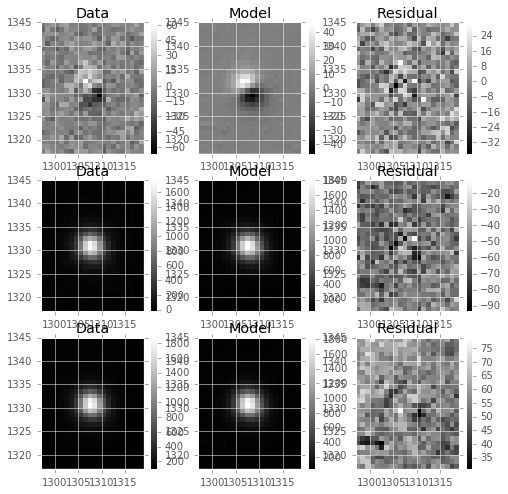

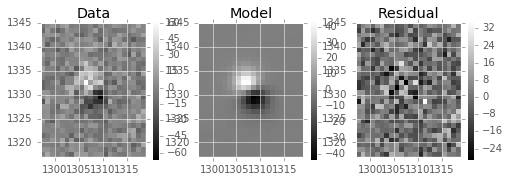

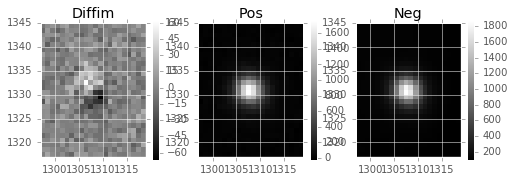

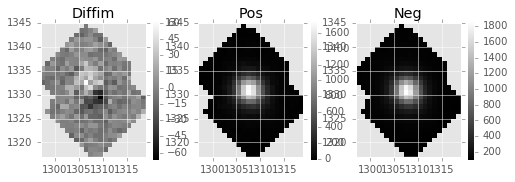

121


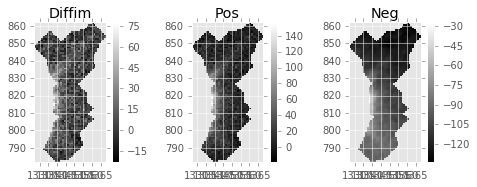

26 Box2I((602, 194), (629, 222)) 501 2
   FOOTPRINT CENTER: 209 613 44.5836105347
   FOOTPRINT CENTER: 205 617 -38.0424880981
29 Box2I((1076, 262), (1114, 292)) 706 3
   FOOTPRINT CENTER: 276 1092 25.1447162628
   FOOTPRINT CENTER: 283 1105 7.36927890778
   FOOTPRINT CENTER: 271 1097 -14.904384613
37 Box2I((389, 313), (414, 336)) 371 2
   FOOTPRINT CENTER: 327 398 11.7507152557
   FOOTPRINT CENTER: 325 403 -20.7818870544
56 Box2I((769, 402), (793, 425)) 379 2
   FOOTPRINT CENTER: 413 779 28.419128418
   FOOTPRINT CENTER: 411 784 -9.33748054504
75 Box2I((484, 545), (510, 571)) 438 2
   FOOTPRINT CENTER: 554 499 7.25062847137
   FOOTPRINT CENTER: 563 493 6.36035776138
78 Box2I((828, 560), (859, 575)) 265 2
   FOOTPRINT CENTER: 567 852 5.83159399033
   FOOTPRINT CENTER: 568 836 -6.17916202545
83 Box2I((747, 581), (772, 597)) 272 2
   FOOTPRINT CENTER: 589 763 8.19659137726
   FOOTPRINT CENTER: 590 756 8.10048389435
106 Box2I((1360, 713), (1384, 735)) 344 2
   FOOTPRINT CENTER: 723 1374 21

/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


{'ip_diffim_DipoleFit_pos_flux': 191.26199261287545, 'ip_diffim_DipoleFit_flag_edge': False, 'ip_diffim_DipoleFit_flag': True, 'ip_diffim_DipoleFit_flag_classification': True, 'ip_diffim_DipoleFit_pos_centroid_y': 23.487165839039598, 'ip_diffim_DipoleFit_pos_centroid_x': 1197.995950694395, 'ip_diffim_DipoleFit_centroid_x': 1196.0960234086942, 'ip_diffim_DipoleFit_centroid_y': 22.140272016505314, 'ip_diffim_DipoleFit_signalToNoise': 7.2999170580344925, 'ip_diffim_DipoleFit_neg_fluxSigma': 7.2999170580344925, 'ip_diffim_DipoleFit_neg_centroid_y': 20.793378193971034, 'ip_diffim_DipoleFit_separation': 4.6578306796753575, 'ip_diffim_DipoleFit_pos_fluxSigma': 7.2999170580344925, 'ip_diffim_DipoleFit_flux': 191.26199261287545, 'ip_diffim_DipoleFit_neg_centroid_x': 1194.1960961229936, 'ip_diffim_DipoleFit_neg_flux': -191.26199261287545, 'ip_diffim_DipoleFit_orientation': 35.33353759457151, 'ip_diffim_DipoleFit_chi2dof': 34.52462831789807}


In [2]:
%run -i examples/runDipoleFitterOnThreeImages.py

PSFs are identical between images...

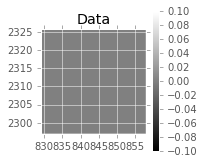

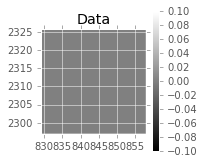

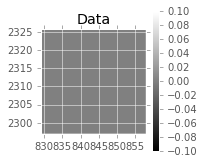

In [3]:
dif_p = diffim.getPsf().computeImage()
#dft.DipoleUtils.displayImage(dif_p)
pos_p = posImage.getPsf().computeImage()
#dft.DipoleUtils.displayImage(pos_p)
neg_p = negImage.getPsf().computeImage()
#dft.DipoleUtils.displayImage(neg_p)

tmp = pos_p.clone()
tmp -= dif_p
dft.DipolePlotUtils.displayImage(tmp)
tmp = neg_p.clone()
tmp -= dif_p
dft.DipolePlotUtils.displayImage(tmp)

Here is a weird case - a bright galaxy with a dipole in the core.

26 Box2I((602, 194), (629, 222)) 501 2
29 Box2I((1076, 262), (1114, 292)) 706 3
37 Box2I((389, 313), (414, 336)) 371 2
56 Box2I((769, 402), (793, 425)) 379 2
75 Box2I((484, 545), (510, 571)) 438 2
78 Box2I((828, 560), (859, 575)) 265 2
83 Box2I((747, 581), (772, 597)) 272 2
106 Box2I((1360, 713), (1384, 735)) 344 2
121 Box2I((1327, 782), (1367, 861)) 1669 7
132 Box2I((1578, 885), (1603, 909)) 414 2
147 Box2I((1416, 1066), (1440, 1089)) 404 2
169 Box2I((235, 1281), (258, 1301)) 295 2
176 Box2I((1291, 1312), (1324, 1348)) 976 6
180 Box2I((718, 1364), (744, 1386)) 388 2
181 Box2I((1701, 1367), (1721, 1389)) 288 2
191 Box2I((634, 1504), (656, 1543)) 545 2
192 Box2I((1415, 1522), (1435, 1539)) 219 2
195 Box2I((1305, 1544), (1328, 1566)) 360 2
197 Box2I((1570, 1548), (1595, 1568)) 277 2
208 Box2I((1593, 1646), (1623, 1665)) 341 2
268 Box2I((1832, 2255), (1857, 2281)) 408 2


/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


311 Box2I((286, 2796), (305, 2822)) 268 2
316 Box2I((59, 2868), (88, 2895)) 514 2
336 Box2I((1694, 3154), (1713, 3169)) 189 2
340 Box2I((1207, 3187), (1232, 3212)) 382 2
363 Box2I((281, 3535), (299, 3558)) 297 2
366 Box2I((1025, 3574), (1051, 3597)) 438 2
395 Box2I((94, 3974), (117, 4001)) 443 2
397 Box2I((1461, 3985), (1485, 4011)) 378 2


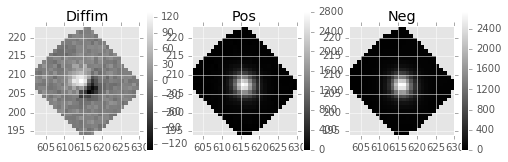

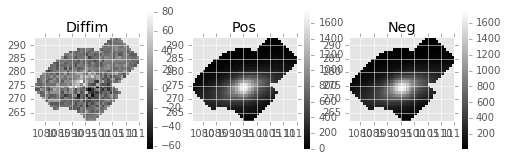

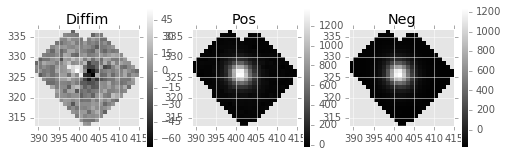

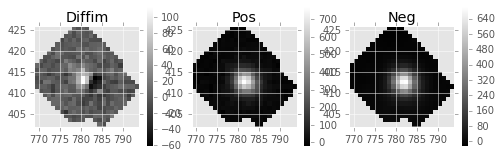

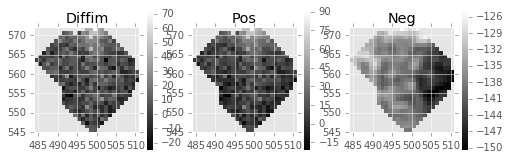

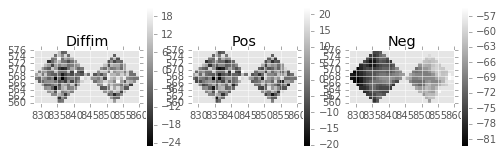

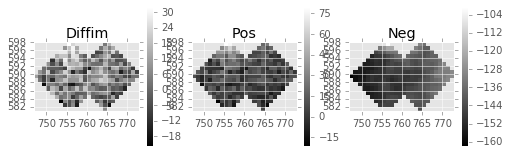

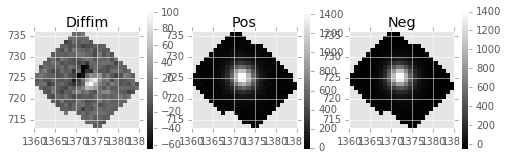

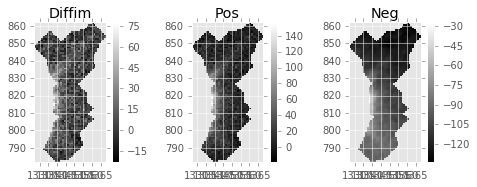

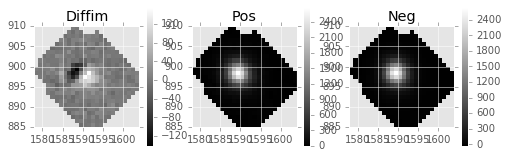

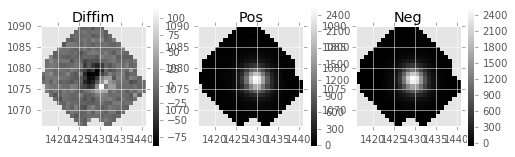

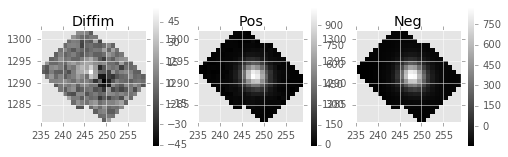

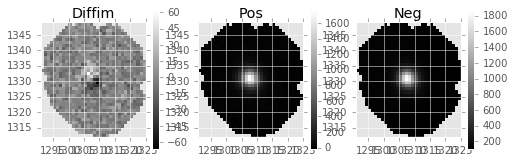

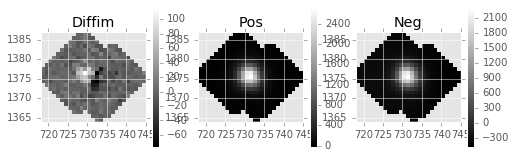

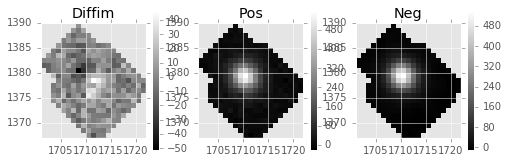

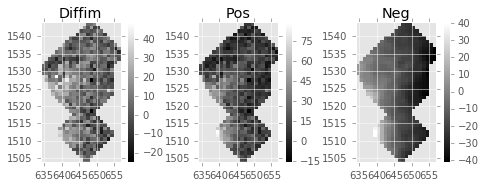

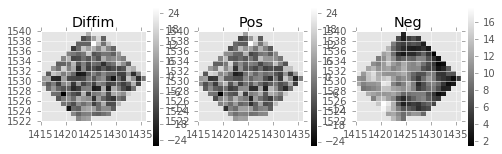

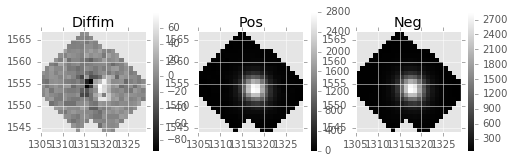

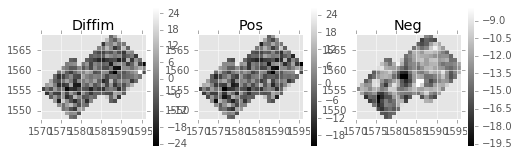

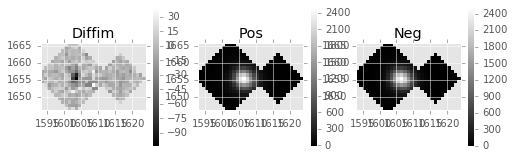

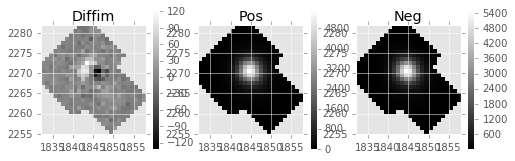

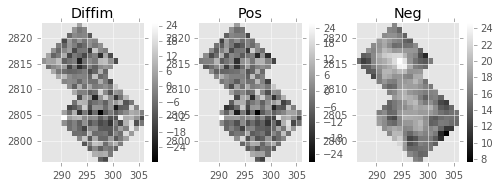

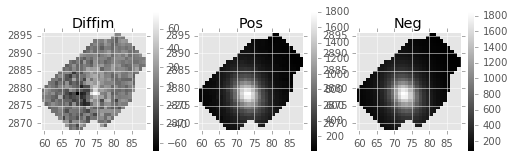

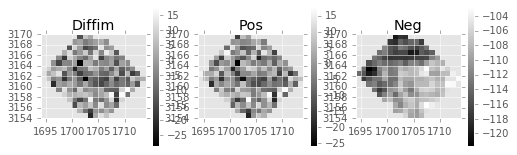

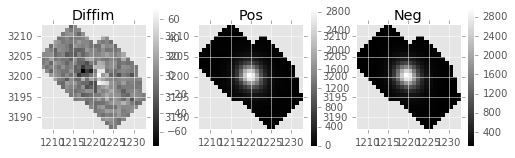

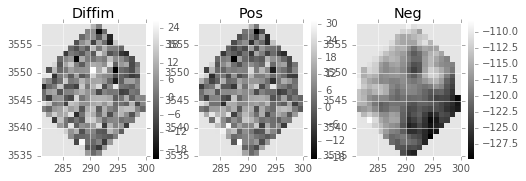

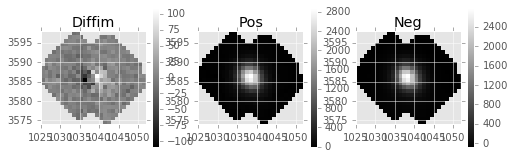

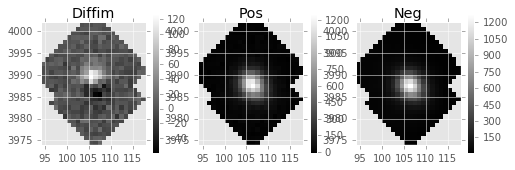

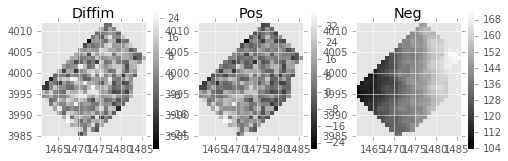

In [4]:
for i,s in enumerate(sources):
    fp = s.getFootprint()
    if (len(fp.getPeaks()) <= 1): continue
    print i, fp.getBBox(), fp.getNpix(), len(fp.getPeaks())
    #for pk in fp.getPeaks():
    #    print '   FOOTPRINT CENTER:', pk.getIy(), pk.getIx(), pk.getPeakValue()

    dft.DipolePlotUtils.displayCutouts(s, diffim, posImage, negImage, asHeavyFootprint=True)

132 Box2I((193, 4026), (207, 4041)) 128 1
   FOOTPRINT CENTER: 4034 200 -5.84640598297
 - Adding parameter for hint "xcenPos"
 - Adding parameter for hint "ycenPos"
 - Adding parameter for hint "xcenNeg"
 - Adding parameter for hint "ycenNeg"
 - Adding parameter for hint "flux"
 - Adding parameter for hint "b"
 - Adding parameter for hint "x1"
 - Adding parameter for hint "y1"
 - Adding parameter "flux"
 - Adding parameter "xcenPos"
 - Adding parameter "ycenPos"
 - Adding parameter "xcenNeg"
 - Adding parameter "ycenNeg"
 - Adding parameter "b"
 - Adding parameter "x1"
 - Adding parameter "y1"
[[Model]]
    Model(genDipoleModel)
[[Fit Statistics]]
    # function evals   = 118
    # data points      = 1950
    # variables        = 8
    chi-square         = 277736.339
    reduced chi-square = 143.016
[[Variables]]
    xcenPos:   1589.09822 +/- 0.005647 (0.00%) (init= 1591)
    ycenPos:   897.844979 +/- 0.005592 (0.00%) (init= 896)
    xcenNeg:   1588.96292 +/- 0.005667 (0.00%) (init= 15

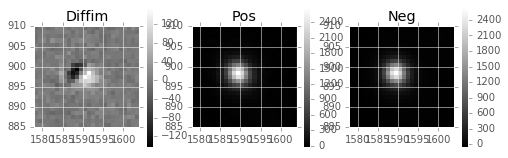

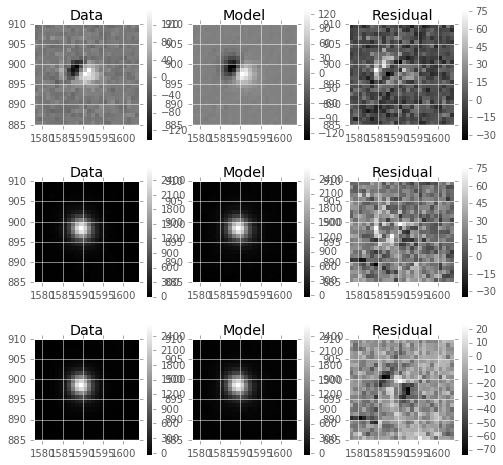

In [5]:
i = 132; s = sources[i]
print i, fp.getBBox(), fp.getNpix(), len(fp.getPeaks())
for pk in fp.getPeaks():
    print '   FOOTPRINT CENTER:', pk.getIy(), pk.getIx(), pk.getPeakValue()

dft.DipolePlotUtils.displayCutouts(s, diffim, posImage, negImage)

result, fitObj = dft.DipoleFitAlgorithm.fitDipole_new(
    diffim, s, posImage, negImage, rel_weight=0.5, separateNegParams=False,
    verbose=True, display=True, return_fitObj=True)

 - Adding parameter for hint "xcenPos"
 - Adding parameter for hint "ycenPos"
 - Adding parameter for hint "xcenNeg"
 - Adding parameter for hint "ycenNeg"
 - Adding parameter for hint "flux"
 - Adding parameter for hint "b"
 - Adding parameter for hint "x1"
 - Adding parameter for hint "y1"
 - Adding parameter "flux"
 - Adding parameter "xcenPos"
 - Adding parameter "ycenPos"
 - Adding parameter "xcenNeg"
 - Adding parameter "ycenNeg"
 - Adding parameter "b"
 - Adding parameter "x1"
 - Adding parameter "y1"
[[Model]]
    Model(genDipoleModel)
[[Fit Statistics]]
    # function evals   = 93
    # data points      = 2436
    # variables        = 8
    chi-square         = 225085.337
    reduced chi-square = 92.704
[[Variables]]
    xcenPos:   615.440601 +/- 0.004080 (0.00%) (init= 613)
    ycenPos:   206.877898 +/- 0.004190 (0.00%) (init= 209)
    xcenNeg:   615.550773 +/- 0.004077 (0.00%) (init= 617)
    ycenNeg:   206.786034 +/- 0.004151 (0.00%) (init= 205)
    flux:      74158.8915 +/

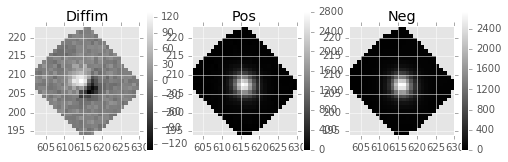

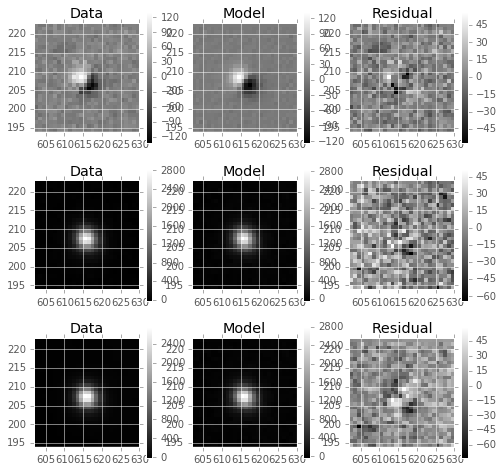

In [6]:
i = 26; s = sources[i]
dft.DipolePlotUtils.displayCutouts(s, diffim, posImage, negImage, asHeavyFootprint=True)

result, fitObj = dft.DipoleFitAlgorithm.fitDipole_new(
    diffim, s, posImage, negImage, rel_weight=0.5, separateNegParams=False,
    verbose=True, display=True, return_fitObj=True)

In [7]:
print result
print np.sqrt((result.psfFitPosCentroidX - result.psfFitNegCentroidX)**2. +
                (result.psfFitPosCentroidY - result.psfFitNegCentroidY)**2.)

resultsOutput(psfFitPosCentroidX=615.44060138790257, psfFitPosCentroidY=206.87789836665803, psfFitNegCentroidX=615.5507732393304, psfFitNegCentroidY=206.78603445896829, psfFitPosFlux=74158.891548696483, psfFitNegFlux=-74158.891548696483, psfFitPosFluxSigma=111.69969080481791, psfFitNegFluxSigma=111.69969080481791, psfFitCentroidX=615.49568731361649, psfFitCentroidY=206.83196641281316, psfFitOrientation=140.17784957968428, psfFitSignaltoNoise=938.9149552972483, psfFitChi2=225085.33730025741, psfFitRedChi2=92.704010420204867)
0.14344620728


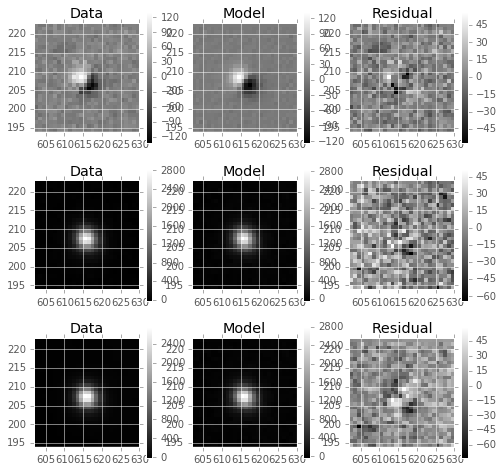

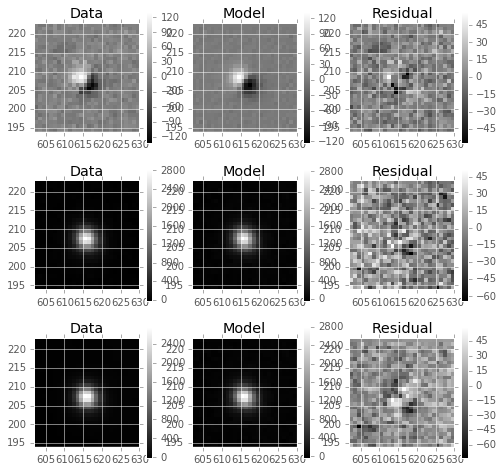

In [8]:
dft.DipolePlotUtils.displayFitResults(fitObj, s.getFootprint())

In [9]:
print   diffim.getMaskedImage().getArrays()[1][0:3,0:10]
print posImage.getMaskedImage().getArrays()[1][0:3,0:10]
print negImage.getMaskedImage().getArrays()[1][0:3,0:10]

[[275 275 275 275 275 275 275 275 275 275]
 [275 275 275 275 275 275 275 275 275 275]
 [275 275 275 275 275 275 275 275 275 275]]
[[19 19 19 19 19 19 19 19 19 19]
 [19 19 19 19 19 19 19 19 19 19]
 [19 19 19 19 19 19 19 19 19 19]]
[[272 272 272 272 272 272 272 272 272 272]
 [272 272 272 272 272 272 272 272 272 272]
 [272 272 272 272 272 272 272 272 272 272]]


 - Adding parameter for hint "xcenPos"
 - Adding parameter for hint "ycenPos"
 - Adding parameter for hint "xcenNeg"
 - Adding parameter for hint "ycenNeg"
 - Adding parameter for hint "flux"
 - Adding parameter for hint "b"
 - Adding parameter for hint "x1"
 - Adding parameter for hint "y1"
 - Adding parameter "flux"
 - Adding parameter "xcenPos"
 - Adding parameter "ycenPos"
 - Adding parameter "xcenNeg"
 - Adding parameter "ycenNeg"
 - Adding parameter "b"
 - Adding parameter "x1"
 - Adding parameter "y1"
[[Model]]
    Model(genDipoleModel)
[[Fit Statistics]]
    # function evals   = 120
    # data points      = 2349
    # variables        = 8
    chi-square         = 739845.232
    reduced chi-square = 316.038
[[Variables]]
    xcenPos:   1902.59714 +/- 0.003429 (0.00%) (init= 1900)
    ycenPos:   492.391766 +/- 0.003450 (0.00%) (init= 494)
    xcenNeg:   1902.66670 +/- 0.003438 (0.00%) (init= 1899.546)
    ycenNeg:   492.333065 +/- 0.003457 (0.00%) (init= 495.4664)
    flux:      

resultsOutput(psfFitPosCentroidX=1902.5971465120952, psfFitPosCentroidY=492.39176632425364, psfFitNegCentroidX=1902.666701531029, psfFitNegCentroidY=492.33306568780046, psfFitPosFlux=163265.17740258761, psfFitNegFlux=-163265.17740258761, psfFitPosFluxSigma=207.63036422102394, psfFitNegFluxSigma=207.63036422102394, psfFitCentroidX=1902.6319240215621, psfFitCentroidY=492.36241600602705, psfFitOrientation=139.8374620703789, psfFitSignaltoNoise=1112.0330545690458, psfFitChi2=739845.2316009209, psfFitRedChi2=316.03811687352453)

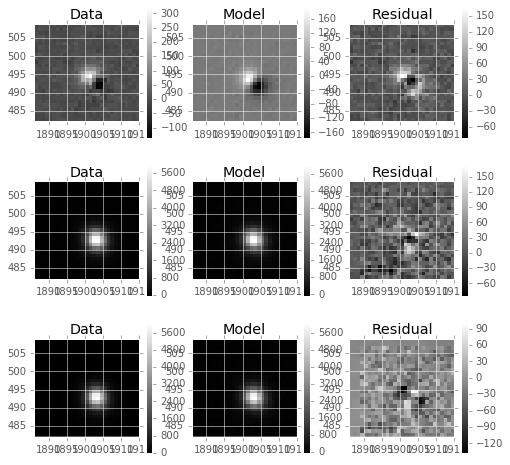

In [10]:
i = 65
s = sources[i]
dft.DipoleFitAlgorithm.fitDipole_new(
    diffim, s, posImage, negImage, rel_weight=0.5, separateNegParams=False,
    verbose=True, display=True)

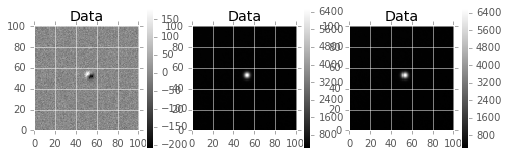

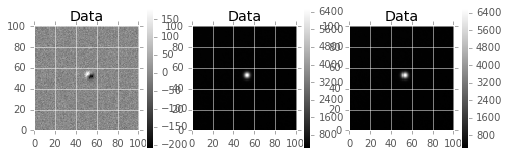

In [14]:
dipole, (posImg, posCat), (negImg, negCat) = \
    dtUtils.DipoleTestUtils.makeDipoleImage(
                xcenPos=[52.59709],
                ycenPos=[52.391713],
                xcenNeg=[52.66664],
                ycenNeg=[52.333020],
                flux=[163270.0], fluxNeg=[163270.0],
                gradientParams=(275.719568,-0.21128660,0.23952046),
                psfSigma=diffim.getPsf().computeShape().getDeterminantRadius())

dft.DipolePlotUtils.displayImages((dipole.getMaskedImage().getImage(), posImg.getMaskedImage().getImage(), 
                                   negImg.getMaskedImage().getImage()))

 - Adding parameter for hint "xcenPos"
 - Adding parameter for hint "ycenPos"
 - Adding parameter for hint "xcenNeg"
 - Adding parameter for hint "ycenNeg"
 - Adding parameter for hint "flux"
 - Adding parameter for hint "b"
 - Adding parameter for hint "x1"
 - Adding parameter for hint "y1"
 - Adding parameter "flux"
 - Adding parameter "xcenPos"
 - Adding parameter "ycenPos"
 - Adding parameter "xcenNeg"
 - Adding parameter "ycenNeg"
 - Adding parameter "b"
 - Adding parameter "x1"
 - Adding parameter "y1"
[[Model]]
    Model(genDipoleModel)
[[Fit Statistics]]
    # function evals   = 174
    # data points      = 2352
    # variables        = 8
    chi-square         = 200153.404
    reduced chi-square = 85.390
[[Variables]]
    xcenPos:   52.5965216 +/- 0.001664 (0.00%) (init= 50)
    ycenPos:   52.3927649 +/- 0.001668 (0.00%) (init= 54)
    xcenNeg:   52.6658513 +/- 0.001669 (0.00%) (init= 55)
    ycenNeg:   52.3349295 +/- 0.001672 (0.00%) (init= 51)
    flux:      1.6305e+05 +/- 9

resultsOutput(psfFitPosCentroidX=52.596521674425198, psfFitPosCentroidY=52.392764985297624, psfFitNegCentroidX=52.665851365412273, psfFitNegCentroidY=52.334929588013068, psfFitPosFlux=163051.94403361043, psfFitNegFlux=-163051.94403361043, psfFitPosFluxSigma=95.355010947055177, psfFitNegFluxSigma=95.355010947055177, psfFitCentroidX=52.631186519918735, psfFitCentroidY=52.363847286655343, psfFitOrientation=140.16485870414562, psfFitSignaltoNoise=2418.2291872596338, psfFitChi2=200153.40383551328, psfFitRedChi2=85.389677404229218)

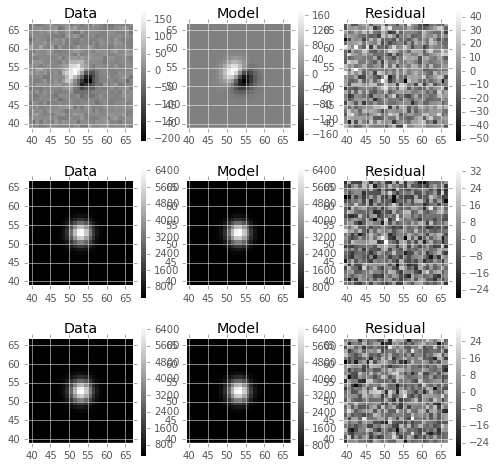

In [15]:
scat = dtUtils.DipoleTestUtils.detectDipoleSources(dipole, posImg, posCat, negImg, negCat, doMerge=True)

dft.DipoleFitAlgorithm.fitDipole_new(
    dipole, scat[0], posImg, negImg, rel_weight=0.5, separateNegParams=False,
    verbose=True, display=True)

 - Adding parameter for hint "xcenPos"
 - Adding parameter for hint "ycenPos"
 - Adding parameter for hint "xcenNeg"
 - Adding parameter for hint "ycenNeg"
 - Adding parameter for hint "flux"
 - Adding parameter "flux"
 - Adding parameter "xcenPos"
 - Adding parameter "ycenPos"
 - Adding parameter "xcenNeg"
 - Adding parameter "ycenNeg"
[[Model]]
    Model(genDipoleModel)
[[Fit Statistics]]
    # function evals   = 252
    # data points      = 784
    # variables        = 5
    chi-square         = 160148.459
    reduced chi-square = 205.582
[[Variables]]
    xcenPos:   52.5134929 +/- 0.717285 (1.37%) (init= 50)
    ycenPos:   52.4193964 +/- 0.594222 (1.13%) (init= 54)
    xcenNeg:   52.7055323 +/- 0.708812 (1.34%) (init= 55)
    ycenNeg:   52.2590692 +/- 0.596226 (1.14%) (init= 51)
    flux:      58916.3518 +/- 4.35e+05 (738.73%) (init= 6675.635)



resultsOutput(psfFitPosCentroidX=52.513492949009724, psfFitPosCentroidY=52.419396412088922, psfFitNegCentroidX=52.705532333572116, psfFitNegCentroidY=52.259069258460229, psfFitPosFlux=58916.351829944761, psfFitNegFlux=-58916.351829944761, psfFitPosFluxSigma=435231.70323204115, psfFitNegFluxSigma=435231.70323204115, psfFitCentroidX=52.60951264129092, psfFitCentroidY=52.339232835274572, psfFitOrientation=140.14264237536258, psfFitSignaltoNoise=0.19143895811062064, psfFitChi2=160148.45906441528, psfFitRedChi2=205.58210406215056)

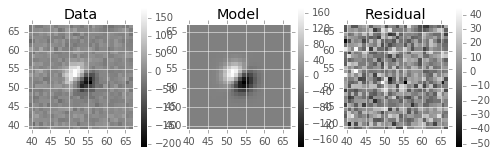

In [16]:
dft.DipoleFitAlgorithm.fitDipole_new(
    dipole, scat[0], posImg, negImg, rel_weight=0., separateNegParams=False,
    verbose=True, display=True)